In [1]:
!pip install pyitlib
import pandas as pd
import numpy as np
import pandas as pd

# For statistical tests
from scipy import stats

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For text EDA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LinearRegression, LogisticRegression

# For entropy computation
from pyitlib import discrete_random_variable as drv

# For mapping to Google Drive
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyitlib: filename=pyitlib-0.2.2-py3-none-any.whl size=28501 sha256=9b0f5138b9ff0003c9d648483671af944bfa8dadd2311f5a445195c09a28c190
  Stored in directory: /root/.cache/pip/wheels/14/96/d6/86e32d66e5bb0440dc344e75849266b2bf2939520672e33e4e
Successfully built pyitlib


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lohdaijiu/BT4012/main/fraud_oracle.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [6]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [7]:
  df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

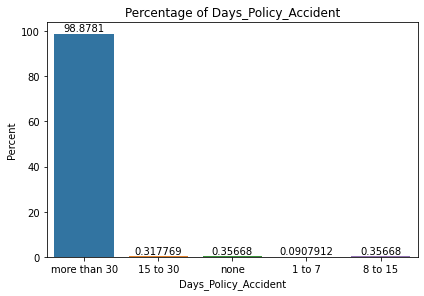

In [8]:
ax = sns.barplot(x='Days_Policy_Accident', y='FraudFound_P', data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")
plt.tight_layout()
plt.title('Percentage of Days_Policy_Accident')
plt.show()

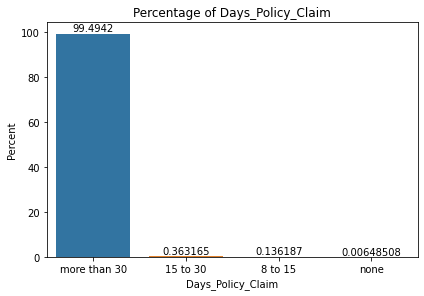

In [9]:
ax = sns.barplot(x='Days_Policy_Claim', y='FraudFound_P', data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")
plt.tight_layout()
plt.title('Percentage of Days_Policy_Claim')
plt.show()

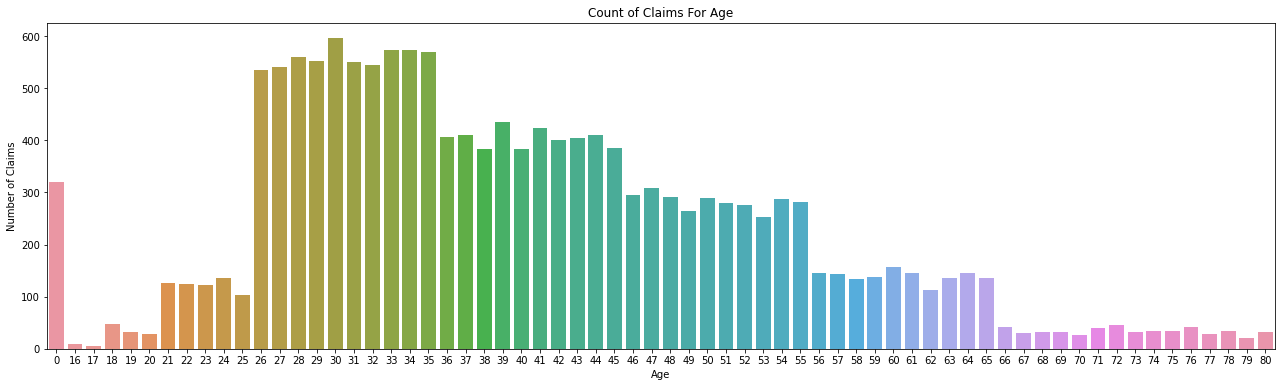

In [10]:
plt.figure(figsize=(22, 6))
sns.countplot(x ='Age', data = df)
plt.title("Count of Claims For Age")
plt.xlabel("Age")
plt.ylabel("Number of Claims")
plt.show()

,Make,FraudFound_P,Total Accidents,Percentage by Make,Percentage by Total
0,Accura,59,472,12.5,0.383
1,BMW,1,15,6.667,0.006
2,Chevrolet,94,1681,5.592,0.61
3,Dodge,2,109,1.835,0.013
4,Ferrari,0,2,0.0,0.0
5,Ford,33,450,7.333,0.214
6,Honda,179,2801,6.391,1.161
7,Jaguar,0,6,0.0,0.0
8,Lexus,0,1,0.0,0.0
9,Mazda,123,2354,5.225,0.798


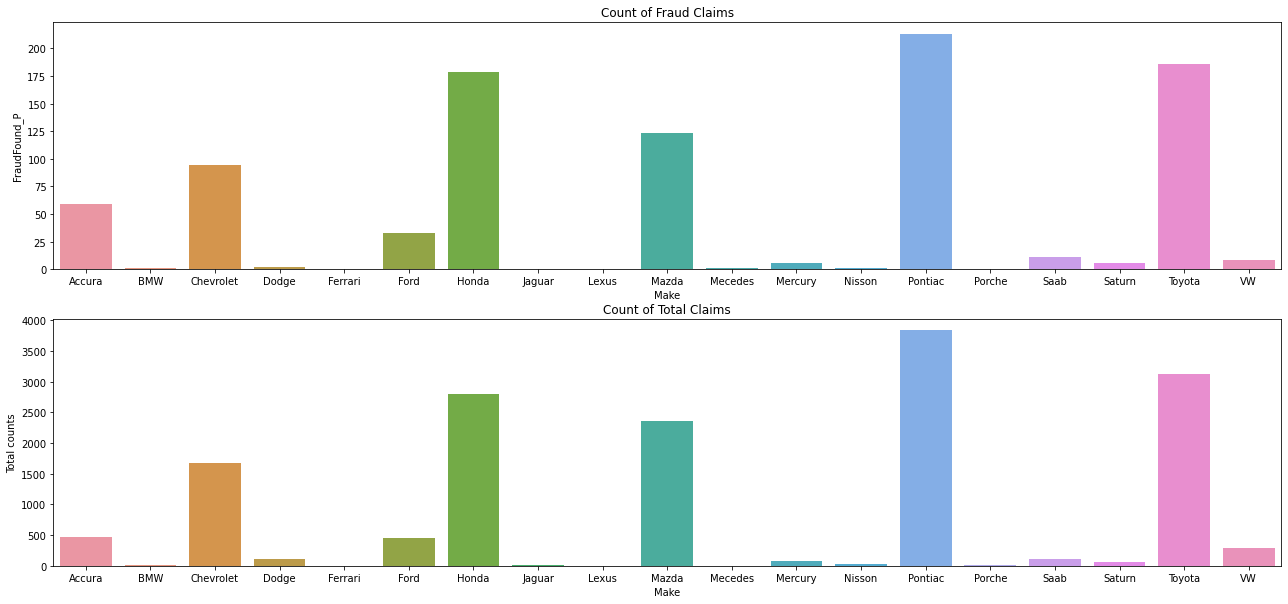

In [11]:
make_count1=df.groupby('Make').agg({'FraudFound_P':'sum'}).reset_index()
make_count2=df.groupby('Make').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 10))
sns.barplot(x='Make', y='FraudFound_P', data = make_count1,ax=ax1)
ax1.set_title("Count of Fraud Claims")
sns.barplot(x='Make', y='FraudFound_P', data = make_count2,ax=ax2)
ax2.set_title("Count of Total Claims")

total_list = pd.concat([make_count1, make_count2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by Make']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by Make'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'Make',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by Make',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,PastNumberOfClaims,FraudFound_P,Total Accidents,Percentage by PastNumberOfClaims,Percentage by Total
0,1,222,3573,6.213,1.44
1,2 to 4,294,5485,5.36,1.907
2,more than 4,68,2010,3.383,0.441
3,none,339,4352,7.79,2.198
4,Column total,923,15420,22.746,5.986


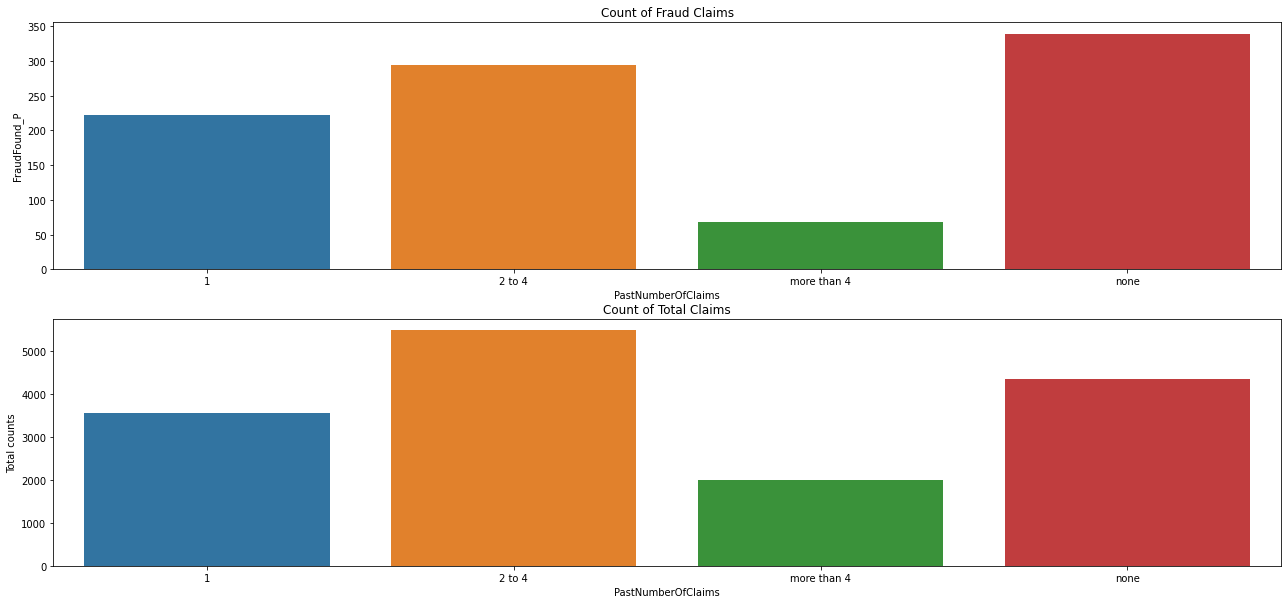

In [12]:
pnoc_count1=df.groupby('PastNumberOfClaims').agg({'FraudFound_P':'sum'}).reset_index()
pnoc_count2=df.groupby('PastNumberOfClaims').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 10))
sns.barplot(x='PastNumberOfClaims', y='FraudFound_P', data = pnoc_count1,ax=ax1)
ax1.set_title("Count of Fraud Claims")
sns.barplot(x='PastNumberOfClaims', y='FraudFound_P', data = pnoc_count2,ax=ax2)
ax2.set_title("Count of Total Claims")

total_list = pd.concat([pnoc_count1, pnoc_count2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by PastNumberOfClaims']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by PastNumberOfClaims'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'PastNumberOfClaims',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by PastNumberOfClaims',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,Fault,FraudFound_P,Total Accidents,Percentage by Fault,Percentage by Total
0,Policy Holder,886,11230,7.89,5.746
1,Third Party,37,4190,0.883,0.24
2,Column total,923,15420,8.773,5.986


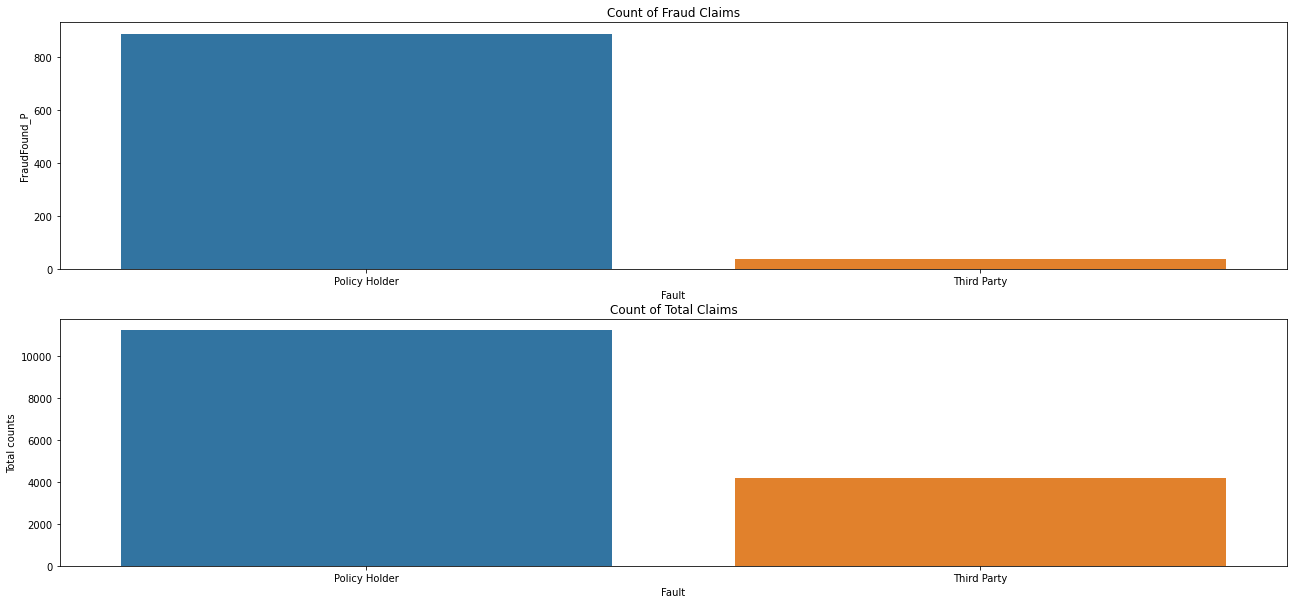

In [13]:
fault_count1=df.groupby('Fault').agg({'FraudFound_P':'sum'}).reset_index()
fault_count2=df.groupby('Fault').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 10))
sns.barplot(x='Fault', y='FraudFound_P', data = fault_count1,ax=ax1)
ax1.set_title("Count of Fraud Claims")
sns.barplot(x='Fault', y='FraudFound_P', data = fault_count2,ax=ax2)
ax2.set_title("Count of Total Claims")

total_list = pd.concat([fault_count1, fault_count2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by Fault']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by Fault'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'Fault',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by Fault',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,BasePolicy,FraudFound_P,Total Accidents,Percentage by BasePolicy,Percentage by Total
0,All Perils,452,4449,10.16,2.931
1,Collision,435,5962,7.296,2.821
2,Liability,36,5009,0.719,0.233
3,Column total,923,15420,18.175,5.985


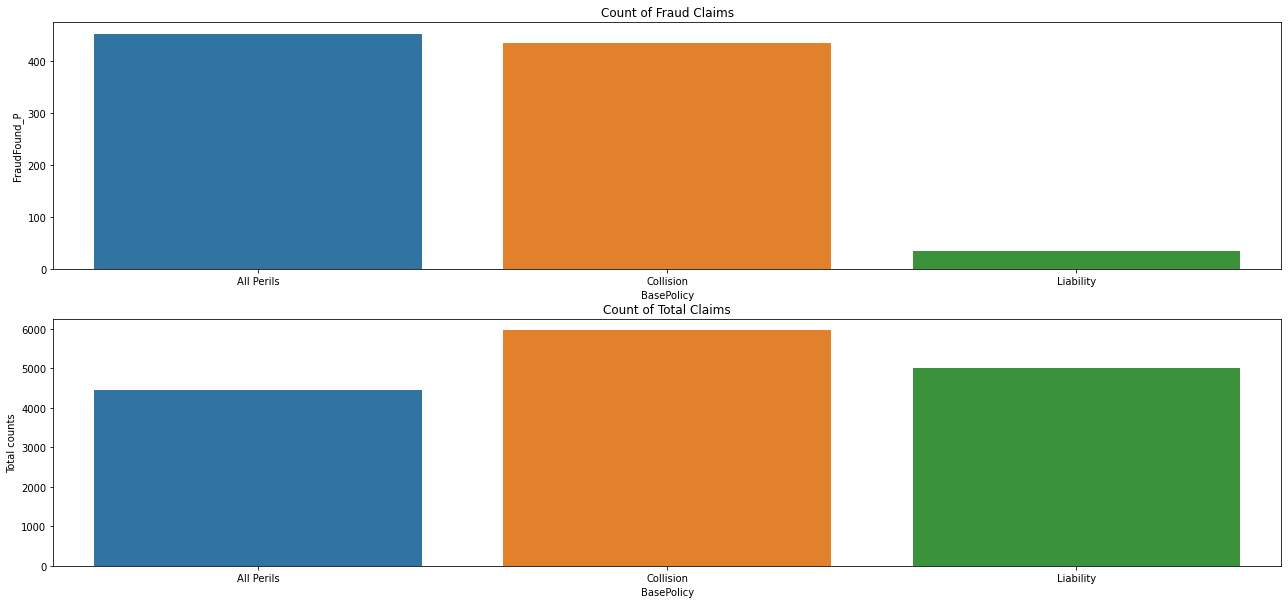

In [14]:
basepolicy_count1=df.groupby('BasePolicy').agg({'FraudFound_P':'sum'}).reset_index()
basepolicy_count2=df.groupby('BasePolicy').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 10))
sns.barplot(x='BasePolicy', y='FraudFound_P', data = basepolicy_count1,ax=ax1)
ax1.set_title("Count of Fraud Claims")
sns.barplot(x='BasePolicy', y='FraudFound_P', data = basepolicy_count2,ax=ax2)
ax2.set_title("Count of Total Claims")

total_list = pd.concat([basepolicy_count1, basepolicy_count2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by BasePolicy']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by BasePolicy'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'BasePolicy',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by BasePolicy',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)

,AgeOfPolicyHolder,FraudFound_P,Total Accidents,Percentage by AgeOfPolicyHolder,Percentage by Total
0,16 to 17,31,320,9.688,0.201
1,18 to 20,2,15,13.333,0.013
2,21 to 25,16,108,14.815,0.104
3,26 to 30,33,613,5.383,0.214
4,31 to 35,360,5593,6.437,2.335
5,36 to 40,237,4043,5.862,1.537
6,41 to 50,144,2828,5.092,0.934
7,51 to 65,70,1392,5.029,0.454
8,over 65,30,508,5.906,0.195
9,Column total,923,15420,71.545,5.987


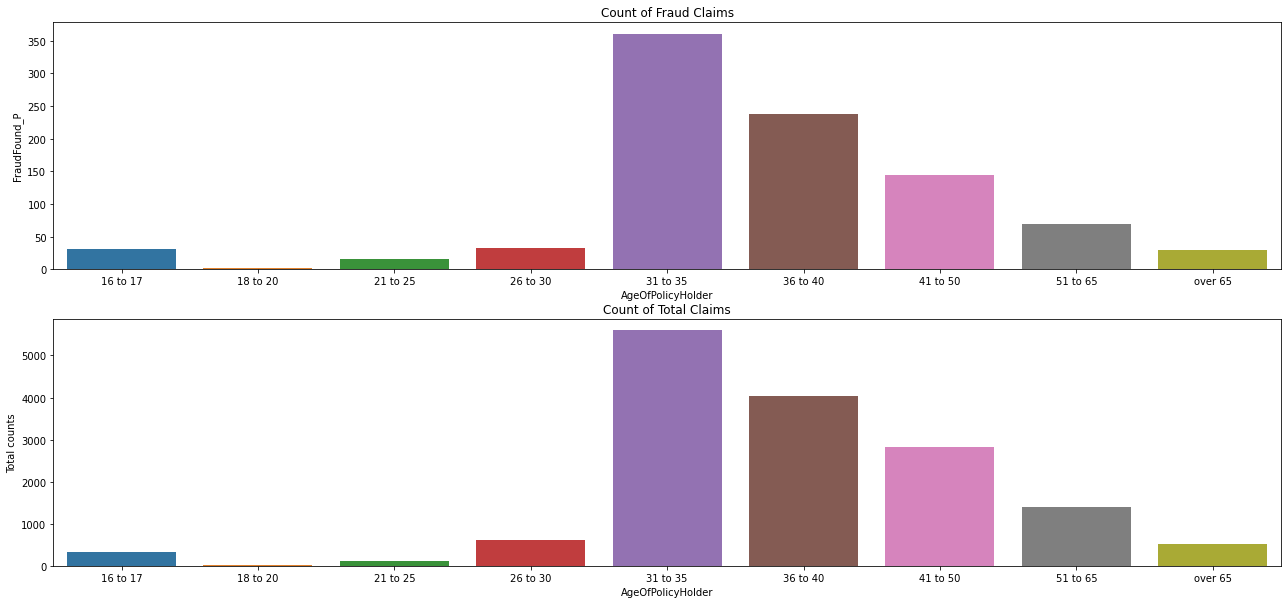

In [15]:
age_count1=df.groupby('AgeOfPolicyHolder').agg({'FraudFound_P':'sum'}).reset_index()
age_count2=df.groupby('AgeOfPolicyHolder').agg('count').reset_index()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(22, 10))
sns.barplot(x='AgeOfPolicyHolder', y='FraudFound_P', data = age_count1,ax=ax1)
ax1.set_title("Count of Fraud Claims")
sns.barplot(x='AgeOfPolicyHolder', y='FraudFound_P', data = age_count2,ax=ax2)
ax2.set_title("Count of Total Claims")

total_list = pd.concat([age_count1, age_count2['FraudFound_P'].rename('Total Accidents')],axis=1)
total_list['Percentage by AgeOfPolicyHolder']= round((total_list['FraudFound_P']/total_list['Total Accidents'])*100,3)
total_list['Percentage by Total'] = round((total_list['FraudFound_P']/sum(total_list['Total Accidents']))*100,3)

ax2.set(ylabel='Total counts')

data = [['Column total'],
        [sum(total_list['FraudFound_P'])], 
        [sum(total_list['Total Accidents'])], 
        [sum(total_list['Percentage by AgeOfPolicyHolder'])], 
        [sum(total_list['Percentage by Total'])]]

nr = pd.DataFrame(data)

nr1 = nr.transpose()
nr1.rename(columns={0:'AgeOfPolicyHolder',1:'FraudFound_P',2:'Total Accidents',3:'Percentage by AgeOfPolicyHolder',4:'Percentage by Total'}, inplace=True)
pd.concat([total_list,nr1],ignore_index=True)